# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Loading Data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

Exploring descriptive statistics

In [3]:
#raw_data.describe()
#only got descriptive for numerical data 
#Thats a default case, if we want to include all columns we simple pass parameter (include='all')

raw_data.describe(include='all')

#Descriptive for categoricals value too

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Only include variable that are necessary

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing values

We can se above in count Price and EngineV contained missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Dealing with missing values:-

1. We can delete missing values
2. We can replace it by mean(), median(), mode()


In [6]:
#Deleting missing values
data_clean = data.dropna(axis=0)

In [7]:
data_clean.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [8]:
data_clean.describe(include='all')

#Note:- mean,std,var,max,min... all these values also got changed after deleting

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Exploring the PDF's

We will plot probability density function 

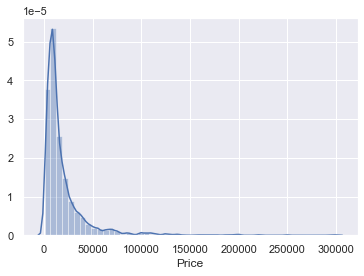

In [9]:
sns.distplot(data_clean['Price'])

#Exponetial graph 
#Outliers Spotted and this can affect the regression dramatically as cost coffecients to be inflated 
#to deal with that remove top 1% values using quatile() method


# Dealing with Outliers

In [10]:
q = data_clean['Price'].quantile(0.99)
data_1 = data_clean[data_clean['Price']<q]   #keeping only those records which are below then 99% value
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


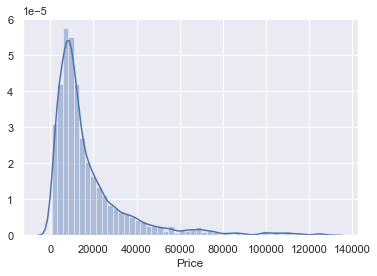

In [11]:
sns.distplot(data_1['Price'])

#Data is distributed in same way but less outliers

In [12]:
q = data_1['Year'].quantile(0.01)
data_2 = data_1[data_1['Year']>q]   #keeping only those records which are below then 99% value

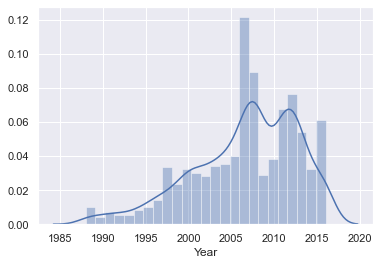

In [13]:
sns.distplot(data_2['Year'])

In [14]:
data_3 = data_2[data_2['EngineV']<6.5]   #keeping only those records which are below then 99% valu

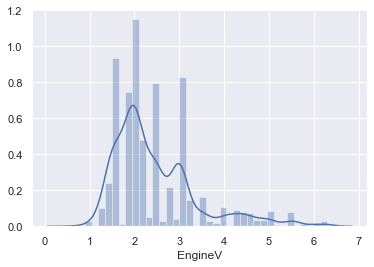

In [15]:
sns.distplot(data_3['EngineV'])

In [16]:
q = data_3['Mileage'].quantile(0.99)
data_4 = data_3[data_3['Mileage']<q]

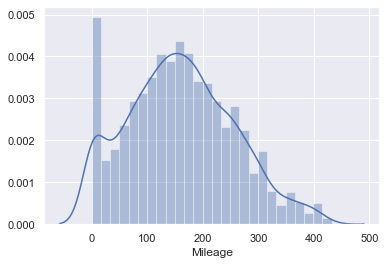

In [17]:
sns.distplot(data_4['Mileage'])

In [18]:
data_cleaned = data_4.reset_index(drop=True)

#To drop previous index and reseting it again 

In [19]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3865,3865.000000,3865,3865.000000,3865.000000,3865,3865,3865.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,847,NaN,1466,NaN,NaN,1806,3504,NaN
mean,NaN,18201.438580,NaN,160.401035,2.450259,NaN,NaN,2006.716171
std,NaN,19088.279971,NaN,95.455403,0.949535,NaN,NaN,6.099113
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking OLS assumption


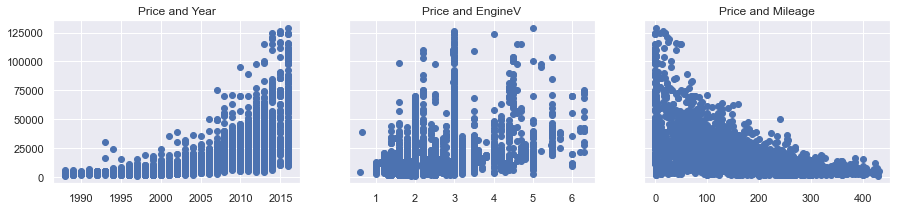

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3 , sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

Every Graph show us relation but not linear one
so we must transform it

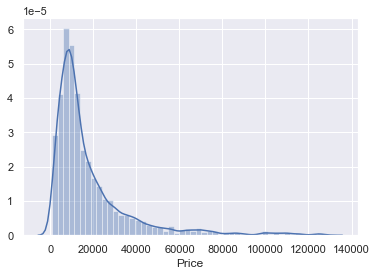

In [21]:
sns.distplot(data_cleaned['Price'])

If we look at price curve it is not normally distributed

we can come up with solution to fix this issue Log Transfomation

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3860,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3861,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3862,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3863,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


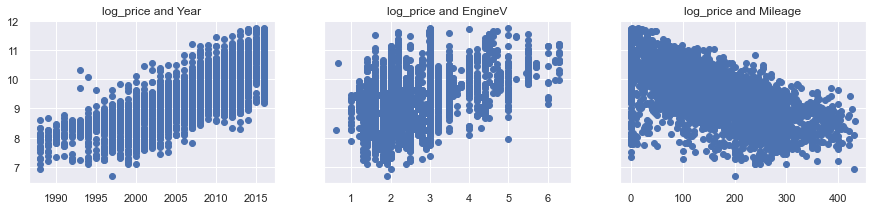

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3 , sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')


plt.show()

Now we can see there is a linear pattern in graphs

In [24]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

#Since we dont need orignal price coloumn we have succefully replaced it by log_price

# Multicollinearity

since after transformation we have let satisified our assumptions. Lets check for multicollinearity 

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

Mileage and year have some collinearity. 
Since sklearn is not suitable to check this assumption we will do it with old method stats_models.

We will find through VIF(Variance Inflation factor)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(variables.values, i )for i in range(variables.shape[1])]
vif['Features'] = variables.columns

#to avoid multicollinearity

In [27]:
vif

,Vif,Features
0,3.797050,Mileage
1,10.361600,Year
2,7.658673,EngineV


In [28]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

# Creating dummy variables

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

#dummies variables used for categorical variable

In [30]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Rearrange a column


In [31]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [32]:
col = ['log_price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

# rearranging coloumn putting log_price at first

In [33]:
data_preprocessed = data_with_dummies[col]

In [34]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

Declaring target and inputs

In [35]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

Scaling the data with Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [37]:
inputs_scaled = scaler.transform(inputs)

#Standardized and Transform all input variables

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=42)

# Creating Rergression

In [39]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
y_hat = reg.predict(x_train)

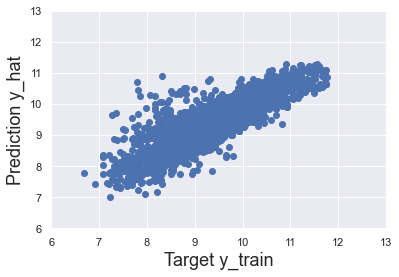

In [41]:
plt.scatter(y_train,y_hat)
plt.xlabel('Target y_train', size=18)
plt.ylabel('Prediction y_hat', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We need our model line to be at 45 degree angle so the predicted value and orginal value will be same. Since our model is same as of linear so we can accept it.

Text(0.5, 1.0, 'Residual PDF')

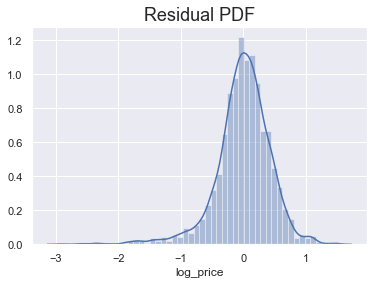

In [42]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size=18)

#Residual are the estimates of error

Another graph plot is "Residual = diffrence between the targets and the predictions"

Since mean is fine mean=0 and graph is also normally distributed. But on negative side there is much longer tail that means there are many negative residuals (far away from the mean)
Given the definition of the residuals (y_train - y_hat), negative values imply
That y_hat (predictions) are much higher than y_train (the targets)
This is food for thought to improve our model  

In [43]:
reg.score(x_train,y_train)

0.7492475960508644

our model expalin 75% of variabilty

# Finding the weights and bias

In [44]:
reg.intercept_

9.415991303178279

In [45]:
reg.coef_

array([-0.46405496,  0.21475289,  0.01174527,  0.00874654, -0.13898131,
       -0.18673754, -0.0584273 , -0.09352494, -0.141793  , -0.09406918,
       -0.18592667, -0.1153181 , -0.15258227, -0.12488262, -0.03293518,
       -0.14956526,  0.31683932])

In [46]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.464055
1,EngineV,0.214753
2,Brand_BMW,0.011745
3,Brand_Mercedes-Benz,0.008747
4,Brand_Mitsubishi,-0.138981
5,Brand_Renault,-0.186738
6,Brand_Toyota,-0.058427
7,Brand_Volkswagen,-0.093525
8,Body_hatch,-0.141793
9,Body_other,-0.094069


Positive weight shows features increases in value price increases. 

Negative weight show feature increses in value price decreases

In [47]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark
#Since in dummy we didn't include Audi So it will play as a benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Positive weight shows that the brand is expensive then the benchmarked brand(AUDI)

Negative weight shows that the brand is cheaper then the benchmarked brand(AUDI)

# Testing

In [48]:
y_hat_test = reg.predict(x_test)

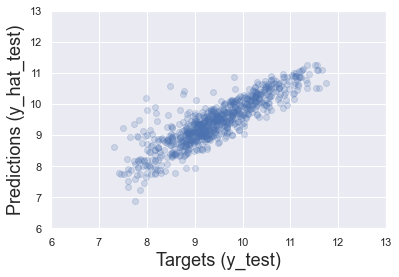

In [49]:
plt.scatter(y_test, y_hat_test, alpha=0.2)  #alpha will specifies the opacity, take value 0-1 and make it like a heat map
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [50]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8564.698260
1,8029.247868
2,17235.738727
3,9606.925887
4,10433.351874


In [52]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,8564.698260,4200.0
1,8029.247868,NaN
2,17235.738727,NaN
3,9606.925887,NaN
4,10433.351874,NaN
...,...,...
768,14627.828005,NaN
769,10769.396342,NaN
770,15090.964330,NaN
771,11326.686497,NaN


In [54]:
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.839277
1    9.093807
2    9.878170
3    9.392662
4    9.680344
Name: log_price, dtype: float64

In [55]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8564.698260,6900.0
1,8029.247868,8900.0
2,17235.738727,19500.0
3,9606.925887,12000.0
4,10433.351874,16000.0
...,...,...
768,14627.828005,13700.0
769,10769.396342,9400.0
770,15090.964330,17800.0
771,11326.686497,8700.0


In [57]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [58]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8564.698260,6900.0,-1664.698260,24.126062
1,8029.247868,8900.0,870.752132,9.783732
2,17235.738727,19500.0,2264.261273,11.611596
3,9606.925887,12000.0,2393.074113,19.942284
4,10433.351874,16000.0,5566.648126,34.791551
...,...,...,...,...
768,14627.828005,13700.0,-927.828005,6.772467
769,10769.396342,9400.0,-1369.396342,14.568046
770,15090.964330,17800.0,2709.035670,15.219302
771,11326.686497,8700.0,-2626.686497,30.191799


In [59]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,773.000000,773.000000,773.000000,773.000000
mean,16350.419911,18103.515330,1753.095419,36.080953
std,13035.961029,18296.289103,9399.845419,63.576843
min,973.589993,1500.000000,-33754.461593,0.010992
25%,7709.882483,7000.000000,-2208.332172,11.447871
50%,12220.839598,11750.000000,244.635982,23.277007
75%,21165.511005,22500.000000,3281.736205,39.272898
max,76311.029337,125000.000000,81834.353432,808.034070


In [61]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
22,21002.31,21000.00,-2.31,0.01
79,21328.19,21335.00,6.81,0.03
384,12886.81,12900.00,13.19,0.10
236,3503.85,3500.00,-3.85,0.11
177,10513.16,10500.00,-13.16,0.13
502,26813.35,26850.00,36.65,0.14
757,10219.89,10200.00,-19.89,0.19
59,30618.85,30500.00,-118.85,0.39
553,8944.25,9000.00,55.75,0.62
86,34818.20,34600.00,-218.20,0.63


In end we can conclude that our model predict results 